# Artificial Neural Networks and Deep Learning

#### *variationalform* <https://variationalform.github.io/>

#### *Just Enough: progress at pace*

<https://variationalform.github.io/>

<https://github.com/variationalform>

Simon Shaw
<https://www.brunel.ac.uk/people/simon-shaw>.


<table>
<tr>
<td>
<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" style="height:18px"/>
</td>
<td>

<p>
This work is licensed under CC BY-SA 4.0 (Attribution-ShareAlike 4.0 International)

<p>
Visit <a href="http://creativecommons.org/licenses/by-sa/4.0/">http://creativecommons.org/licenses/by-sa/4.0/</a> to see the terms.
</td>
</tr>
</table>

<table>
<tr>
<td>This document uses python</td>
<td>
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" style="height:30px"/>
</td>
<td>and also makes use of LaTeX </td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/LaTeX_logo.svg/320px-LaTeX_logo.svg.png" style="height:30px"/>
</td>
<td>in Markdown</td> 
<td>
<img src="https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png" style="height:30px"/>
</td>
</tr>
</table>

## What this is about:

- Binary Classification.

- Separating planes, hyperplanes: **decision boundaries**.

- Support Vectors.


As usual our emphasis will be on *doing* rather than *proving*:
*just enough: progress at pace*

# NEEDS UPDATING

For this material you are recommended Pages 1-43 of [SVMS], 

then ??????????? Chapters 9 of [MML], Chapter 3 of [MLFCES], Chapter 7 of [IPDS], 

- SVMS: Support Vector Machines Succinctly by Alexandre Kowalczyk.
  <https://www.syncfusion.com/succinctly-free-ebooks/support-vector-machines-succinctly>
- MML: Mathematics for Machine Learning, by Marc Peter Deisenroth, A. Aldo Faisal, and Cheng Soon Ong.
  Cambridge University Press. <https://mml-book.github.io>.
- MLFCES: Machine Learning: A First Course for Engineers and Scientists, by Andreas Lindholm,
  Niklas Wahlström, Fredrik Lindsten, Thomas B. Schön. Cambridge University Press. 
  <http://smlbook.org>.
- IPDS: Introduction to Probability for Data Science, by Stanley H. Chan,
  <https://probability4datascience.com>

These can be accessed legally and without cost.

There are also these useful references for coding:

- PT: `python`: <https://docs.python.org/3/tutorial>
- NP: `numpy`: <https://numpy.org/doc/stable/user/quickstart.html>
- MPL: `matplotlib`: <https://matplotlib.org>

## Context

In the last section of this course we are going to take a look at the 
mathematical formulation of artificial neural networks.

We will be building on the feed forward algorithm we met in the section
on perceptrons.

We know that if we have the weights and biases we can (at least imagine)
that the networks carves up the output space into compartments that can
be used for classification.

But we need to start with training data, and use this to determine the
weights and biases.

- Gradient Descent
- Learning Rate (in particular) and hyperparameters (in general)
- backprop
- choosing activation functions (e.g. MA2647, output negative etc)

We start by looking at the data we are going to use: 
**The MNIST data set of handwritten digits**.

This will all be done manually - we wont use `sklearn` for this section


### MNIST Data Set of Handwritten Digits

The original source of these digitized images is here:
<http://yann.lecun.com/exdb/mnist/>

This format isn't particularly easy to work with, so here,
<https://pjreddie.com/projects/mnist-in-csv/>, makes two 
CSV files available:

- `MNIST_train.csv` - $60,000$ handwritten digit images, for training
- `MNIST_test.csv`  - $10,000$ handwritten digit images, for testing

Further, for testing and developement it is useful to have
small data sets, and so Rashid for his book 
**Make Your Own Neural Network**
<https://github.com/makeyourownneuralnetwork/makeyourownneuralnetwork>
made these two smaller sets,

- `MNIST_train_100.csv` - $100$, for training
- `MNIST_test_10.csv` - $10$, for testing

This book was also used for these notes.

There are also these (home made), for intermediate use:

- `MNIST_train_1000.csv` - $1000$, for training
- `MNIST_test_100.csv` - $100$, for testing    

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
import seaborn
import pandas
import matplotlib.pyplot as plt
 

these parts below might be legacy


```
datafile = open("./data/MNIST/MNIST_train_1000.csv", 'r')
traindatalist = datafile.readlines()
datafile.close()
print(f'Data file length = {len(traindatalist)} (number of rows)')
print('First record (line)...\n', traindatalist[0])
print('The first entry is the label, the rest are the 784 features...')
```

Friendlier...

```
train_pixel_values = traindatalist[0].split(',')
image_array = np.asfarray( train_pixel_values[1:]).reshape((28,28))
plt.imshow( image_array , cmap='Greys', interpolation='None')
plt.title(f'Digitized Image With Label {train_pixel_values[0]}')
print(f'There are 28x28 = {28*28} pixel values: 0,1,...,255')
print('0 is white, 255 is black 2,3,...,254 are grays')
```

Load test and train data.

Scale all inputs to (0,1)


```
N_train = len(traindatalist)
X_train = np.zeros((N_train, 784))
print(f'Shape of X_train = {X_train.shape}')
for k in range(N_train):
  train_pixel_values = traindatalist[k].split(',')
  X_train[k,:] = np.asfarray(train_pixel_values[1:])
# No to this, observations in rows, features along rows
#X_train = X_train.T
#print(X_train.shape)
```

```
plt.imshow(X_train[0,:].reshape(28,28) , cmap='Greys', interpolation='None')
```

```
datafile = open("./data/MNIST/MNIST_test_100.csv", 'r')
testdatalist = datafile.readlines()
datafile.close()
print(f'Data file length = {len(testdatalist)} (number of rows)')
print('First record (line)...\n', testdatalist[0])
print('The first entry is the label, the rest are the 784 features...')
```

```
test_pixel_values = testdatalist[0].split(',')
image_array = np.asfarray(test_pixel_values[1:]).reshape((28,28))
N_test = len(testdatalist)
X_test = np.zeros((N_test, 784))
print(f'Shape of X_test = {X_test.shape}')
print(X_test.shape)
for k in range(N_test):
  test_pixel_values = testdatalist[k].split(',')
  X_test[k,:] = np.asfarray(test_pixel_values[1:])
```

Scale them

observations are in rows...

```
print(X_train[0,:])
for k in range(N_train):
  X_train[k,:] /= 255
print(k)

for k in range(N_test):
  X_test[k,:] /= 255
print(k)

print(X_train[99,:].max())
print(X_train[99,:].min())
print(X_train[99,150:190])

```

In [32]:
#plt.imshow(X_train[0,:].reshape(28,28) , cmap='Greys', interpolation='None')

network arch


```
<img src="../notebooks/gfx/ann_4.png" style="height:500px"/>
```

```
Now one hot the training data

explain

digits/labels 0,1,2,3,4,5,6,7,8,9

digit/label = k => y_k = 1, y_j =0 for j\ne k

breaking our rule - observations are in columns.
```

```
y_train = np.zeros((10, X_train.shape[0]))
print(f'Shape of y_train = {y_train.shape}')

y_test = np.zeros((10, X_test.shape[0]))
print(f'Shape of y_test = {y_test.shape}')

```


In [33]:
#print(train_pixel_values[:])

In [34]:
#print(testdatalist)

```
train_labels = np.zeros(N_train, dtype=np.int64)
for k in range(N_train):
  label = int(traindatalist[k].split(',')[0])
  y_train[label,k] = 1
  train_labels[k] = int(label)

test_labels = np.zeros(N_test, dtype=np.int64)
for k in range(N_test):
  label = int(testdatalist[k].split(',')[0])
  y_test[label,k] = 1
  test_labels[k] = int(label)

print(train_labels.shape)
print(test_labels.shape)
```

```
plt.bar(range(10),y_train.sum(axis=1))
plt.bar(range(10),y_test.sum(axis=1))
```

```
print(train_labels)
print(test_labels)
```

Let's get the data - you'll need to grab it and unzip it from Brightspace.

In [35]:
choice = 1
if choice == 0:
  df_train = pandas.read_csv(r'./data/MNIST/MNIST_train.csv', header=None)
  df_test  = pandas.read_csv(r'./data/MNIST/MNIST_test.csv', header=None)
elif choice == 1:
  df_train = pandas.read_csv(r'./data/MNIST/MNIST_train_1000.csv', header=None)
  df_test  = pandas.read_csv(r'./data/MNIST/MNIST_test_100.csv', header=None)
else:
  df_train = pandas.read_csv(r'./data/MNIST/MNIST_train_100.csv', header=None)
  df_test  = pandas.read_csv(r'./data/MNIST/MNIST_test_10.csv', header=None)

print(type(df_train))
print(type(df_test))

# We assign the pixel values to X_train and X_test
X_train = df_train.iloc[:, 1:].values
X_test  = df_test.iloc[:, 1:].values
N_train = X_train.shape[0]
N_test  = X_test.shape[0]
print(f'N_train = {N_train}, N_test = {N_test}')

# And we assign the 0,1,2,...,9 labels to 
train_labels = df_train.iloc[:, 0].values
test_labels  = df_test.iloc[:, 0].values

print(type(X_train))
print(type(X_test))
print(type(train_labels))
print(type(test_labels))

print(X_train.shape)
print(X_test.shape)
print(train_labels.shape)
print(test_labels.shape)

df_train.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
N_train = 1000, N_test = 100
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 784)
(100, 784)
(1000,)
(100,)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
print(train_labels[:9])

[6 5 8 3 1 9 4 4 3]


There are 28x28 = 784 pixel values: 0,1,...,255
0 is white, 255 is black 2,3,...,254 are grays


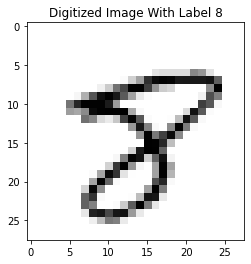

In [37]:
#image_array = np.asfarray( train_pixel_values[1:]).reshape((28,28))
row = 2
plt.imshow( X_train[row,:].reshape(28,28) , cmap='Greys', interpolation='None')
#plt.title(f'Digitized Image With Label {train_pixel_values[row]}')
plt.title(f'Digitized Image With Label {train_labels[row]}')
print(f'There are 28x28 = {28*28} pixel values: 0,1,...,255')
print('0 is white, 255 is black 2,3,...,254 are grays')

In [38]:
X_train = X_train/255
X_test  = X_test/255

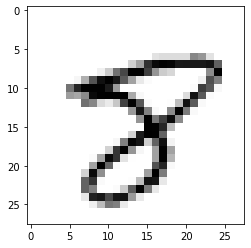

In [39]:
plt.imshow(X_train[row,:].reshape(28,28) , cmap='Greys', interpolation='None')

network arch


```
<img src="../notebooks/gfx/ann_4.png" style="height:500px"/>
```

```
Now one hot the training data

explain

digits/labels 0,1,2,3,4,5,6,7,8,9

digit/label = k => y_k = 1, y_j =0 for j\ne k

breaking our rule - observations are in columns.
```

In [40]:
y_train = np.zeros((10, N_train))
print(f'Shape of y_train = {y_train.shape}')

y_test = np.zeros((10, N_test))
print(f'Shape of y_test = {y_test.shape}')




Shape of y_train = (10, 1000)
Shape of y_test = (10, 100)


In [41]:
#train_labels = np.zeros(N_train, dtype=np.int64)
for k in range(N_train):
#  label = int(traindatalist[k].split(',')[0])
  label = train_labels[k]
  y_train[label,k] = 1
#  train_labels[k] = int(label)

#test_labels = np.zeros(N_test, dtype=np.int64)
for k in range(N_test):
#  label = int(testdatalist[k].split(',')[0])
  label = test_labels[k]
  y_test[label,k] = 1
#  test_labels[k] = int(label)

#print(train_labels.shape)
#print(test_labels.shape)

<BarContainer object of 10 artists>

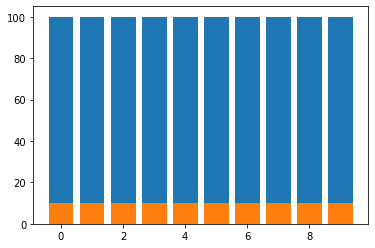

In [42]:
plt.bar(range(10),y_train.sum(axis=1))
plt.bar(range(10),y_test.sum(axis=1))

In [43]:
# add up all the ones
print(y_train.sum(axis=1).sum())
print(y_test.sum(axis=1).sum())

1000.0
100.0


In [44]:
inn = 784  # input number of nodes
h1n = 500  # hidden 1
h2n = 200  # hidden 2
onn = 10   # output 

W1 = 0.5 - np.random.rand(inn,h1n)
W2 = 0.5 - np.random.rand(h1n,h2n)
W3 = 0.5 - np.random.rand(h2n,onn)

b1 = np.zeros([h1n,1]) # 0.5 - np.random.rand(h1n,1)
b2 = np.zeros([h2n,1]) # 0.5 - np.random.rand(h2n,1)
b3 = np.zeros([onn,1]) # 0.5 - np.random.rand(onn,1)

print(f'W1 shape: {W1.shape}')
print(f'W2 shape: {W2.shape}')
print(f'W3 shape: {W3.shape}')

print(f'b1 shape: {b1.shape}')
print(f'b2 shape: {b2.shape}')
print(f'b3 shape: {b3.shape}')

W1 shape: (784, 500)
W2 shape: (500, 200)
W3 shape: (200, 10)
b1 shape: (500, 1)
b2 shape: (200, 1)
b3 shape: (10, 1)


Choose these - we need to d/dx

In [45]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
def ReLU(x):
  return np.maximum(0,x)

In [46]:
def Diff_sigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))
def Diff_ReLU(x):
  return np.heaviside(x,0)

Feed forward

algorithm... Paste from before

The feed forward algortithm, for $L$ layers (not including the input layer) is,

\begin{align*}
& \boldsymbol{a}_0 = \boldsymbol{x},
\\
& \text{for } k = 1,2,\ldots,L,
\\
&\qquad \boldsymbol{n}_k = \boldsymbol{W}_k^T\boldsymbol{a}_{k-1}+\boldsymbol{b}_k,
\\
&\qquad \boldsymbol{a}_k = \sigma_k(\boldsymbol{n}_k),
\\
&\boldsymbol{y} = \boldsymbol{a}_L.
\end{align*}

In [47]:
k = np.random.randint(0, X_train.shape[0])
a0 = X_train[k,:].reshape(-1,1)
print(a0.shape)

n1 = W1.T @ a0 + b1
a1 = sigmoid(n1)

n2 = W2.T @ a1 + b2
a2 = sigmoid(n2)

n3 = W3.T @ a2 + b3
a3 = sigmoid(n3)

y = a3

print(y.shape)

(784, 1)
(10, 1)


### Gradient Descent Demonstrations

<table>
  <tr>
    <th>Company</th>
    <th>Contact</th> 
    <th>Country</th>
  </tr>
  <tr>
    <td>Alfreds Futterkiste</td>
    <td>Maria Anders</td> 
    <td>Germany</td>
  </tr>
  <tr>
    <td>Centro comercial Moctezuma</td>
    <td>Francisco Chang</td> 
    <td>Mexico</td>
  </tr>
</table>

### Gradient Descent Demonstrations - Global and Local minima

<table>
  <tr>
    <td>
        <img src="./gfx/GradientDescent/GlobalMin.gif" style="height:300px"/>
    </td>
    <td>
        <img src="./gfx/GradientDescent/LocalMin.gif" style="height:300px"/>
    </td>
  </tr>
</table>


### Gradient Descent Demonstrations - Saddle Points

<table>
  <tr>
    <td>
        <img src="./gfx/GradientDescent/SaddlePoint1.gif" style="height:300px"/>
    </td>
    <td>
        <img src="./gfx/GradientDescent/SaddlePoint2.gif" style="height:300px"/>
    </td>
  </tr>
</table>


Mac, Terminal

```
system_profiler SPPowerDataType
```

Bettrey full. Disconnect charger. Run below

```
6417 mAh at start, dim display.
```

In [48]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice
rng = np.random.default_rng()
alpha = 0.3

# loop through epochs
N_ep = 10
TSEcost = np.zeros([N_ep,1])

for ep in range(N_ep):

#for _ in range(2):

  for _ in range(N_train):

  
    # select a random without replacement
    j = rng.choice(N_train, 1, replace=False)
#    print(j)
    # forward prop
    a0 = X_train[j,:].reshape(-1,1)
    n1 = W1.T @ a0 + b1
    a1 = sigmoid(n1)
    n2 = W2.T @ a1 + b2
    a2 = sigmoid(n2)
    n3 = W3.T @ a2 + b3
    a3 = sigmoid(n3)
    y = a3
    # backprop
    error = y_train[:,j] - y
    if True:
#      print(a0)
#      print(y)
#      print(y_train[:,j])
      pass


    A3 = np.diagflat(Diff_sigmoid(n3))
    A2 = np.diagflat(Diff_sigmoid(n2))
    A1 = np.diagflat(Diff_sigmoid(n1))

#    print('A1 = ', A1[:5,:5])

    
    if True:
#      print(A3)
      pass

    S3 = -2*A3@error
    S2 = A2@W3@S3
    S1 = A1@W2@S2

    W3 = W3 - alpha * a2@S3.T
    W2 = W2 - alpha * a1@S2.T
    W1 = W1 - alpha * a0@S1.T

    b3 = b3 - alpha * S3
    b2 = b2 - alpha * S2
    b1 = b1 - alpha * S1

    # update cost - loop through training set
    print(error.shape)
    print(y.shape)
    print(y_train[:,j].shape)

  for j in range(N_train):
      a0 = X_train[j,:].reshape(-1,1)
      n1 = W1.T @ a0 + b1
      a1 = sigmoid(n1)
      n2 = W2.T @ a1 + b2
      a2 = sigmoid(n2)
      n3 = W3.T @ a2 + b3
      a3 = sigmoid(n3)
      y = a3
      print(y.shape)
      print(y_train[:,[j]].shape)

      error = y_train[:,[j]] - y
      print(error.shape)
      TSEcost[ep] += (error * error).sum()



(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)
(10, 1)


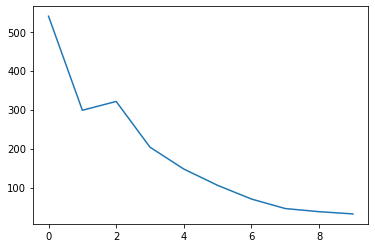

In [49]:
plt.plot(range(N_ep), TSEcost)

In [50]:
# test
y_pred = np.zeros((10, X_test.shape[0]))
print(f'Shape of y_test = {y_test.shape}')

# create scorecards...
success = np.zeros(10)
failure = np.zeros(10)

for k in range(N_test):
  # forward prop
  a0 = X_test[k,:].reshape(-1,1)
  n1 = W1.T @ a0 + b1
  a1 = sigmoid(n1)
  n2 = W2.T @ a1 + b2
  a2 = sigmoid(n2)
  n3 = W3.T @ a2 + b3
  a3 = sigmoid(n3)
  y_pred[:,[k]] = a3  
  if np.argmax(a3) == test_labels[k]:
#    print(test_labels[k])
#    print(np.argmax(a3))
    success[test_labels[k]] += 1
  else:
    failure[test_labels[k]] += 1


Shape of y_test = (10, 100)


```
y_mod = np.zeros(y_pred.shape)
print(y_test)
#print(y_pred)
indx_max = np.argmax(y_pred, axis=0)
print(indx_max)
#y_mod[indx_max,:] = 1
for k in range(N_test):
  y_mod[indx_max[k],k] = 1
print(y_mod)
```

In [51]:

y_test_cm = np.zeros(N_test)
y_pred_cm = np.zeros(N_test)
test_indx_max = np.argmax(y_test, axis=0)
#print(test_indx_max)

pred_indx_max = np.argmax(y_pred, axis=0)
for k in range(N_test):
  y_test_cm[k] = test_indx_max[k]
  y_pred_cm[k] = pred_indx_max[k]

#print(y_test_cm)
#print(y_pred_cm)

In [53]:
print(success)
print(failure)

[ 9.  8.  9.  7.  9.  9. 10.  9.  9.  9.]
[1. 2. 1. 3. 1. 1. 0. 1. 1. 1.]


In [54]:
# MYO small set wont fill up the full 0,1,...,9 range for the CM
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_cm, y_pred_cm)
print("Confusion Matrix:")
print(cm)
accsc = accuracy_score(y_test_cm,y_pred_cm)
print("Accuracy:", accsc)

Confusion Matrix:
[[ 9  0  1  0  0  0  0  0  0  0]
 [ 0  8  0  0  1  0  0  0  1  0]
 [ 0  1  9  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  2  0  0  1  0]
 [ 0  0  0  0  9  0  0  0  1  0]
 [ 1  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  1  0  0  0  0  9  0  0]
 [ 0  0  0  1  0  0  0  0  9  0]
 [ 0  1  0  0  0  0  0  0  0  9]]
Accuracy: 0.88


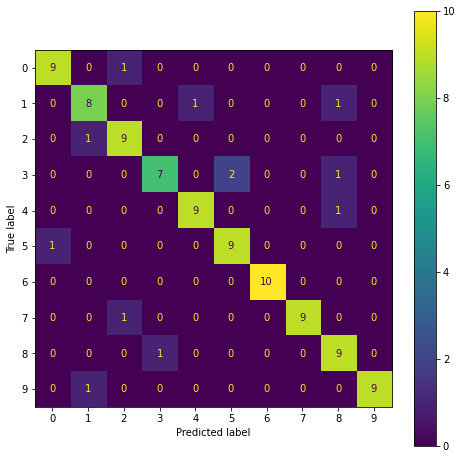

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
cmplot = ConfusionMatrixDisplay(cm, display_labels=range(10))
#plt.figure(figsize=(15, 15))
#cmplot.plot()

fig, ax = plt.subplots(figsize=(8,8))
cmplot.plot(ax=ax)

#plt.show()

In [ ]:
# use in problem sheet to see just what a CM input is.
# from https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/?utm_content=cmp-true
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 
def to_target(x):
    """Map targets to target names"""   
    return list(dataset.target_names)[x]
 
# Load data
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df['target_names'] = df['target'].apply(to_target)
 
 
# Define predictor and predicted datasets
X = df.drop(['target','target_names'], axis=1).values
y = df['target_names'].values
 
# split taining and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
 
# train the model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)


In [ ]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
print(y_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<http://playground.tensorflow.org>

<https://ethics-of-ai.mooc.fi/chapter-1/1-a-guide-to-ai-ethics>



# ANN in a few lines
21 Oct 2022 from https://twitter.com/svpino/status/1582703127651721217

In [ ]:
import numpy as np

def sigmoid(x):
  return 1 / (1+np.exp(-x))

def neural_network(X,y):
    learning_rate = 0.1
    W1 = np.random.rand(2,4)
    W2 = np.random.rand(4,1)
    
    for epoch in range(1000):
        layer1 = sigmoid(np.dot(X, W1))
        output = sigmoid(np.dot(layer1, W2))
        error = y-output
        delta2 = 2 * error * (output * (1 - output))
        delta1 = delta2.dot(W2.T) * (layer1 * (1 - layer1))
        W2 += learning_rate * layer1.T.dot(delta2)
        W1 += learning_rate * X.T.dot(delta1)
    
    return np.round(output).flatten()

X = np.array([[0,0],[0,1],[1,0],[1,1]])

print(  "OR", neural_network( X, np.array([[0,1,1,1]]).T ) )
print( "AND", neural_network( X, np.array([[0,0,0,1]]).T ) )
print( "XOR", neural_network( X, np.array([[0,1,1,0]]).T ) )
print("NAND", neural_network( X, np.array([[1,1,1,0]]).T ) )
print( "NOR", neural_network( X, np.array([[1,0,0,0]]).T ) )

### Review

We covered *just enough*, to make *progress at pace*. We looked at

- SVM
- distance
- ???????????????????????????????????????????????

Now we can look at the perceptron.

## Technical Notes, Production and Archiving

Ignore the material below. What follows is not relevant to the material being taught.

#### Production Workflow

- Finalise the notebook material above
- Clear and fresh run of entire notebook
- Create html slide show:
  - `jupyter nbconvert --to slides 14_ann.ipynb `
- Set `OUTPUTTING=1` below
- Comment out the display of web-sourced diagrams
- Clear and fresh run of entire notebook
- Comment back in the display of web-sourced diagrams
- Clear all cell output
- Set `OUTPUTTING=0` below
- Save
- git add, commit and push to FML
- copy PDF, HTML etc to web site
  - git add, commit and push
- rebuild binder

Some of this originated from

<https://stackoverflow.com/questions/38540326/save-html-of-a-jupyter-notebook-from-within-the-notebook>

These lines create a back up of the notebook. They can be ignored.

At some point this is better as a bash script outside of the notebook

In [ ]:
%%bash
NBROOTNAME=14_ann
OUTPUTTING=0

if [ $OUTPUTTING -eq 1 ]; then
  jupyter nbconvert --to html $NBROOTNAME.ipynb
  cp $NBROOTNAME.html ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.html
  mv -f $NBROOTNAME.html ./formats/html/

  jupyter nbconvert --to pdf $NBROOTNAME.ipynb
  cp $NBROOTNAME.pdf ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.pdf
  mv -f $NBROOTNAME.pdf ./formats/pdf/

  jupyter nbconvert --to script $NBROOTNAME.ipynb
  cp $NBROOTNAME.py ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.py
  mv -f $NBROOTNAME.py ./formats/py/
else
  echo 'Not Generating html, pdf and py output versions'
fi